In [1]:
import pandas as pd
from pymeos import *

from pyspark.sql.types import *
from pyspark.sql.functions import col, count, rand, collect_list,explode, struct, count, lit
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql import SparkSession

from pysparkmeos.utils.udt_appender import *

import os, sys

In [5]:
pymeos_initialize()

tps = TGeogPointSeq("[POINT(1 1)@2001-01-01 08:00:00, Point(0 0)@2001-01-01 08:05:00)")
tpss = TGeogPointSeqSet(sequence_list=["[POINT(1 1)@2001-01-01 08:00:00, Point(0 0)@2001-01-01 08:05:00)", "[POINT(1 2)@2001-01-01 08:10:00, Point(0 0)@2001-01-01 08:20:00)"])
print(tpss)
df = pd.DataFrame([tps for _ in range(10)])

def play_with_seq(x: TGeogPointSeq, dummy):
    xstr = x.__str__()
    print(dummy)
    return TGeogPointSeq(xstr)

df.map(lambda x: play_with_seq(x, 4))

{[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)@2001-01-01 08:05:00+00), [POINT(1 2)@2001-01-01 08:10:00+00, POINT(0 0)@2001-01-01 08:20:00+00)}
4
4
4
4
4
4
4
4
4
4


,0
0,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
1,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
2,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
3,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
4,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
5,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
6,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
7,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
8,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."
9,"[POINT(1 1)@2001-01-01 08:00:00+00, POINT(0 0)..."


In [3]:
# Initialize PyMEOS
pymeos_initialize("UTC")

os.environ['PYSPARK_DRIVER_PYTHON_OPTS']= "notebook"
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
os.environ['PYSPARK_PYTHON'] = sys.executable
# Set the JAVA_HOME environment variable
# os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'

#     #.config("spark.default.parallelism", 12) \
# Initialize a Spark session
spark = SparkSession.builder \
    .appName("PandasUDFTest") \
    .master("local[*]") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

# spark.sparkContext.setLogLevel("INFO")

# Append the UDT mapping to the PyMEOS classes
udt_append()

# Get the value of 'spark.default.parallelism'
default_parallelism = spark.sparkContext.getConf().get("spark.default.parallelism")

#spark.sparkContext.getConf().install_pypi_package("pyarrow==0.14.1")

print(f"spark.default.parallelism: {default_parallelism}")

df = spark.range(0, 10 * 1000 * 1000).withColumn('id', (col('id') / 10000).cast('integer')).withColumn('v', rand())
df.cache()
df.count()

df.show()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/02 07:21:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


spark.default.parallelism: None


+---+-------------------+
| id|                  v|
+---+-------------------+
|  0| 0.9183612883665493|
|  0|0.22168759555736917|
|  0|0.11706550624939394|
|  0| 0.9889198166610549|
|  0|0.02365881663527225|
|  0| 0.8320700498027981|
|  0| 0.9748827826639265|
|  0| 0.5745173315812835|
|  0| 0.7907302974174624|
|  0| 0.9118785460233629|
|  0| 0.7921007543076698|
|  0| 0.9033484929762396|
|  0|  0.346862859557292|
|  0| 0.7751074996411976|
|  0| 0.9227464645588118|
|  0|0.20882881443511636|
|  0|0.20164858943268738|
|  0|0.03413614726995906|
|  0|0.41260437091019786|
|  0|0.33047944360822235|
+---+-------------------+
only showing top 20 rows



In [4]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

@pandas_udf("double")
def pandas_plus_one(v: pd.Series) -> pd.Series:
    return v + 1

df.withColumn('v', pandas_plus_one(df.v)).agg(count(col('v'))).show()

+--------+
|count(v)|
+--------+
|10000000|
+--------+



+--------+
|count(v)|
+--------+
|10000000|
+--------+



+--------+
|count(v)|
+--------+
|10000000|
+--------+



+--------+
|count(v)|
+--------+
|10000000|
+--------+



+--------+
|count(v)|
+--------+
|10000000|
+--------+



+--------+
|count(v)|
+--------+
|10000000|
+--------+



+--------+
|count(v)|
+--------+
|10000000|
+--------+



ERROR:root:KeyboardInterrupt while sending command.                 (0 + 4) / 4]
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.9/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
"""
def get_bounds(current: Union[TGeogPointInstWrap, STBoxWrap], tpoint: Union[TGeogPointInstWrap, STBoxWrap] = None):
    pymeos_initialize()
    if not current:
        return STBoxWrap(tpoint.bounding_box().__str__().strip("GEOD"))
    if type(current) == TGeogPointInstWrap:
        current = STBoxWrap(current.bounding_box().__str__().strip("GEOD"))
    if type(tpoint) == TGeogPointInstWrap:
        tpoint = STBoxWrap(tpoint.bounding_box().__str__().strip("GEOD"))
    # print(current, tpoint)
    return STBoxWrap((current + tpoint).__str__())

# Read data from a CSV file
data_path = "../../small_states_2022-06-27-00_only_points"  # Update this with your CSV file path

# Read
schema = StructType().add("Point", TGeogPointInstUDT(),True)
data = spark.read.csv(data_path, schema=schema).limit(100)

rdd = data.rdd.map(lambda x: x['Point'])

# Declare the bounds and generate the partitioning grid
bounds = rdd.reduce(get_bounds)
gp = GridPartition(cells_per_side=3, bounds=bounds)
# Register the udf
get_partition_key_udf = udf(gp.get_partition, IntegerType())
num_partitions = gp.num_partitions()
gridstr = gp.gridstr

data = data.withColumn("partitionKey", get_partition_key_udf(col("Point"), lit(gridstr)))

print(rdd.getNumPartitions())
rdd = data.rdd.map(lambda x: (x['partitionKey'], x['Point'])).partitionBy(num_partitions)

data = rdd.toDF(['partitionKey', 'Point'])
print(data.rdd.getNumPartitions())
data.show()

# bounds = STBox("STBOX XT(((-177.02969360351562,-46.421356201171875),(177.816650390625,70.29727935791016)),[2022-06-27 00:00:00+00, 2022-06-27 00:15:00+00])" , geodetic=True)

"""

In [2]:
import prettymaps

In [15]:
import matplotlib.pyplot as plt
from prettymaps import plot

/usr/local/lib/python3.9/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = np.nan
/usr/local/lib/python3.9/dist-packages/osmnx/geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geomet

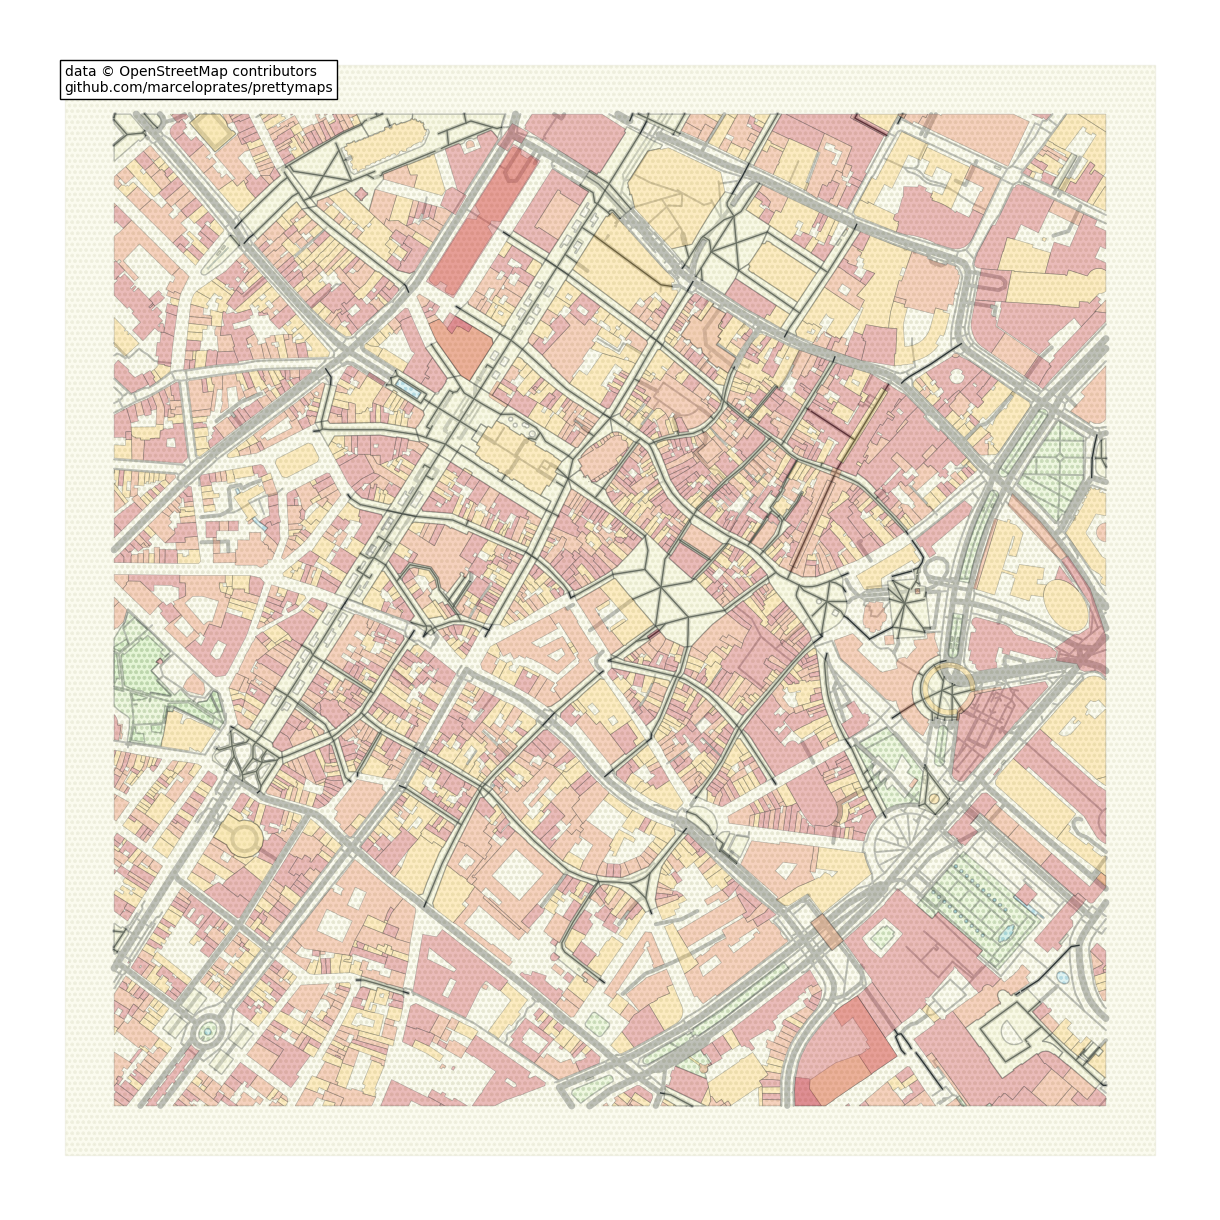

In [20]:
layers = plot(
  #Centre the map center at 
  "Brussels, Belgium",
  #postprocessing = postprocessing,
  #Name and select the various layers we want on the map
  #We want a square map so ensure that we're not querying for data in a circle
  style = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1, 'alpha': 0.3},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0, 'alpha': 0.3},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1, 'alpha': 0.3},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1, 'alpha': 0.3},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2, 'alpha': 0.3},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3, 'alpha': 0.3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 0.3, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4, 'alpha': 0.3},
        }
)

In [2]:
pymeos_initialize()

In [3]:
gridstr = ['STBOX XT(((475982.1452146133,6583193.925816207),(495595.9328811999,6601525.43837019)),[2020-06-01 06:47:36.426576+00, 2020-06-11 14:58:24.149496+00))', 'STBOX XT(((485789.0390479066,6592359.682093198),(495595.9328811999,6601525.43837019)),[2020-06-06 10:53:00+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((490692.4859645532,6596942.560231694),(495595.9328811999,6601525.43837019)),[2020-06-09 00:55:42+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((493144.20942287653,6599233.999300942),(495595.9328811999,6601525.43837019)),[2020-06-10 07:57:03+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((494370.0711520382,6600379.718835566),(495595.9328811999,6601525.438370191)),[2020-06-10 23:27:43+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((494370.0711520382,6600379.718835566),(495595.9328811999,6601525.438370191)),[2020-06-10 07:57:03+00, 2020-06-10 23:27:43+00])', 'STBOX XT(((494370.0711520382,6599233.999300942),(495595.9328811999,6600379.718835566)),[2020-06-10 23:27:43+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((494370.0711520382,6599233.999300942),(495595.9328811999,6600379.718835566)),[2020-06-10 07:57:03+00, 2020-06-10 23:27:43+00])', 'STBOX XT(((493144.20942287653,6600379.718835566),(494370.0711520382,6601525.438370191)),[2020-06-10 23:27:43+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((493144.20942287653,6600379.718835566),(494370.0711520382,6601525.438370191)),[2020-06-10 07:57:03+00, 2020-06-10 23:27:43+00])', 'STBOX XT(((493144.20942287653,6599233.999300942),(494370.0711520382,6600379.718835566)),[2020-06-10 23:27:43+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((493144.20942287653,6599233.999300942),(494370.0711520382,6600379.718835566)),[2020-06-10 07:57:03+00, 2020-06-10 23:27:43+00])', 'STBOX XT(((493144.20942287653,6599233.999300942),(495595.9328811999,6601525.43837019)),[2020-06-09 00:55:42+00, 2020-06-10 07:57:03+00])', 'STBOX XT(((493144.20942287653,6596942.560231694),(495595.9328811999,6599233.999300942)),[2020-06-10 07:57:03+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((493144.20942287653,6596942.560231694),(495595.9328811999,6599233.999300942)),[2020-06-09 00:55:42+00, 2020-06-10 07:57:03+00])', 'STBOX XT(((490692.4859645532,6599233.999300942),(493144.20942287653,6601525.43837019)),[2020-06-10 07:57:03+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((490692.4859645532,6599233.999300942),(493144.20942287653,6601525.43837019)),[2020-06-09 00:55:42+00, 2020-06-10 07:57:03+00])', 'STBOX XT(((490692.4859645532,6596942.560231694),(493144.20942287653,6599233.999300942)),[2020-06-10 07:57:03+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((490692.4859645532,6596942.560231694),(493144.20942287653,6599233.999300942)),[2020-06-09 00:55:42+00, 2020-06-10 07:57:03+00])', 'STBOX XT(((490692.4859645532,6596942.560231694),(495595.9328811999,6601525.43837019)),[2020-06-06 10:53:00+00, 2020-06-09 00:55:42+00])', 'STBOX XT(((490692.4859645532,6592359.682093198),(495595.9328811999,6596942.560231694)),[2020-06-09 00:55:42+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((490692.4859645532,6592359.682093198),(495595.9328811999,6596942.560231694)),[2020-06-06 10:53:00+00, 2020-06-09 00:55:42+00])', 'STBOX XT(((485789.0390479066,6596942.560231694),(490692.4859645532,6601525.43837019)),[2020-06-09 00:55:42+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((485789.0390479066,6596942.560231694),(490692.4859645532,6601525.43837019)),[2020-06-06 10:53:00+00, 2020-06-09 00:55:42+00])', 'STBOX XT(((485789.0390479066,6592359.682093198),(490692.4859645532,6596942.560231694)),[2020-06-09 00:55:42+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((485789.0390479066,6592359.682093198),(490692.4859645532,6596942.560231694)),[2020-06-06 10:53:00+00, 2020-06-09 00:55:42+00])', 'STBOX XT(((485789.0390479066,6592359.682093198),(495595.9328811999,6601525.43837019)),[2020-06-01 06:47:36+00, 2020-06-06 10:53:00+00])', 'STBOX XT(((485789.0390479066,6583193.925816207),(495595.9328811999,6592359.682093198)),[2020-06-06 10:53:00+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((485789.0390479066,6583193.925816207),(495595.9328811999,6592359.682093198)),[2020-06-01 06:47:36+00, 2020-06-06 10:53:00+00])', 'STBOX XT(((475982.1452146133,6592359.682093198),(485789.0390479066,6601525.43837019)),[2020-06-06 10:53:00+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((475982.1452146133,6592359.682093198),(485789.0390479066,6601525.43837019)),[2020-06-01 06:47:36+00, 2020-06-06 10:53:00+00])', 'STBOX XT(((475982.1452146133,6583193.925816207),(485789.0390479066,6592359.682093198)),[2020-06-06 10:53:00+00, 2020-06-11 14:58:24+00])', 'STBOX XT(((475982.1452146133,6583193.925816207),(485789.0390479066,6592359.682093198)),[2020-06-01 06:47:36+00, 2020-06-06 10:53:00+00])']

In [4]:
grid = [STBox(tile) for tile in gridstr]

In [11]:
def gentestdata(read_as='TInst'):
    import pandas as pd

    testtrips = pd.read_csv(
        "../../mobilitydb-berlinmod-sf0.1/trips_sample_pymeos.csv",
        index_col=0
    )
    testtrips['trip'] = testtrips['trip'].apply(lambda x: TGeomPointSeqSet(x))
    bounds = TemporalPointExtentAggregator().aggregate(testtrips['trip'])
    seqs1 = []
    seqs = []
    if read_as == 'TInst':
        seqs1 = [trip.instants() for trip in testtrips['trip']]
        for seq in seqs1:
            seqs.extend(seq)
        return seqs, bounds
    if read_as == 'TSeq':
        seqs1 = [trip.sequences() for trip in testtrips['trip']]
        for seq in seqs1:
            seqs.extend(seq)
        return seqs, bounds
    if read_as == 'TSeqSet':
        return list(testtrips['trip']), bounds
        
testtrips, bounds = gentestdata(read_as='TSeqSet')

33


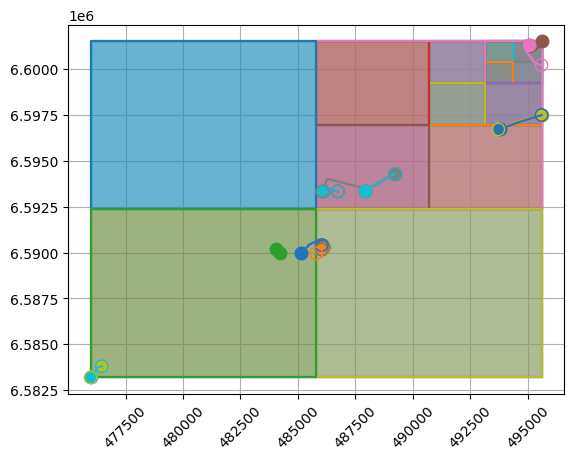

In [13]:
import matplotlib
import matplotlib.pyplot as plt
print(len(grid))
for tile in grid:
    tile.plot_xy()

for testtrip in testtrips:
    testtrip.plot()